In [1]:
"""Imports"""
import json

import src.executor.execute

import src.data_operations.load_data
import src.data_operations.prepare_data

import src.nn_operations.basic

In [2]:
"""Paths and constants"""

PATHS = {
    "DATASET"        : "dataset",
    "TEST_CSV"       : "dataset/test.csv",
    "TRAIN_CSV"      : "dataset/train.csv",
    "VAL_CSV"        : "dataset/validation.csv",
    "LABEL_MAP_PATH" : "dataset/label_map.json"
}

with open(PATHS["LABEL_MAP_PATH"]) as json_file:
    PATHS["LABEL_MAP"] = json.load(json_file)

In [3]:
def main():
    # 0. Set paths
    src.executor.execute.stage_set_paths(PATHS)
    
    # 1. Prepare test, train and validation data. Display the results
    data_dict = src.executor.execute.stage_preparation()

    # 2. Load test, train and validation data into memory
    data = src.executor.execute.stage_load_data(data_dict)
    
    # 3. Create simple cnn model and compile it
    cnn_model = src.executor.execute.stage_nn_init()
    
    # 4. Train the model
    training_history = src.executor.execute.stage_nn_train(cnn_model, data)

    # 5. Test the model
    src.executor.execute.stage_nn_test(cnn_model, data)
    
    # 6. Save the model
    src.executor.execute.stage_nn_save(cnn_model)

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>1. Prepare test, train and validation data</span></div>**

Execution time: 0.02s


**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>2. Load test, train and validation data into memory</span></div>**

Execution time: 8.50s


**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>3. Create and compile CNN model</span></div>**

**<span style='color:white; font-size:18px'>Model summary</span>**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>4. Train CNN model</span></div>**

Epoch 1/10
591/591 [==============================] - 23s 39ms/step - loss: 1.6032 - accuracy: 0.3858 - val_loss: 0.8500 - val_accuracy: 0.6996
Epoch 2/10
591/591 [==============================] - 23s 38ms/step - loss: 0.8777 - accuracy: 0.6839 - val_loss: 0.6685 - val_accuracy: 0.7593
Epoch 3/10
591/591 [==============================] - 22s 38ms/step - loss: 0.6504 - accuracy: 0.7687 - val_loss: 0.6430 - val_accuracy: 0.7667
Epoch 4/10
591/591 [==============================] - 23s 38ms/step - loss: 0.5818 - accuracy: 0.7890 - val_loss: 0.5677 - val_accuracy: 0.7987
Epoch 5/10
591/591 [==============================] - 22s 38ms/step - loss: 0.4910 - accuracy: 0.8254 - val_loss: 0.5207 - val_accuracy: 0.8178
Epoch 6/10
591/591 [==============================] - 22s 38ms/step - loss: 0.4380 - accuracy: 0.8432 - val_loss: 0.4954 - val_accuracy: 0.8322
Epoch 7/10
591/591 [==============================] - 23s 38ms/step - loss: 0.4006 - accuracy: 0.8577 - val_loss: 0.6548 - val_accuracy:

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>5. Test the CNN model</span></div>**

85/85 - 1s - loss: 0.5928 - accuracy: 0.8078
Test accuracy: 0.8077777624130249


**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>6. Save the model</span></div>**

INFO:tensorflow:Assets written to: models_pb\small_cnn_1947211221\assets


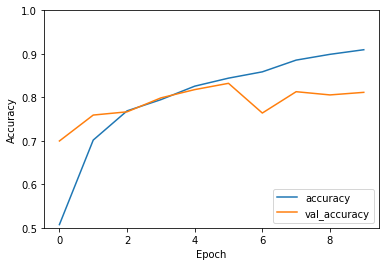

In [4]:
if __name__ == "__main__" :
        main()